In [5]:
from data_pipeline import *
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from clustering import *
import seaborn as sns
import scipy.stats as stats
from ggan import normalize, restore_scale
from scipy.io import mminfo,mmread

In [6]:
root_gene = None
minimum_evidence = 'weak'
max_depth = np.inf
r_expr, gene_symbols, sample_names = load_data(root_gene=root_gene,
                                     minimum_evidence=minimum_evidence,
                                     max_depth=max_depth)
nb_genes = len(gene_symbols)
synthetic_name = 'EColi_n{}_r{}_e{}_d{}'.format(len(gene_symbols), root_gene, minimum_evidence, max_depth)
s_expr, s_gs = load_synthetic(synthetic_name)

assert (np.array(gene_symbols) == np.array(s_gs)).all()

# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = r_expr[train_idxs, :]
expr_test = r_expr[test_idxs, :]

# Clip outliers
r_min = np.min(expr_train)
r_max = np.max(expr_train)
s_expr[s_expr < r_min] = r_min
s_expr[s_expr > r_max] = r_max


Found 4297 genes in datafile


In [7]:
#sns.clustermap(r_expr);
#plt.show()

In [8]:
#Find most variable genes and save in a csv file to encode with a VAE
GE= mmread('./data/marchantia/matrix_f.mtx')
GE = GE.toarray()
GE = GE.astype('float32')
GE=GE.T

In [60]:

GE_std=np.mean(GE,axis=0)
print(np.std(GE_std))
indexes=np.where(GE_std>0.1*np.std(GE_std))[0]
indexes2=np.where(GE_std>0.1)[0]
indexes2.shape

30.745


(3556,)

In [61]:
#plt.hist(np.std(GE,axis=0), bins=1000)
#plt.show()

In [62]:
GE_mvg=GE[:,indexes2]
GE_mvg.shape

(3747, 3556)

In [12]:
#data_GE_mvg=pd.DataFrame(data=GE_mvg)
#data_GE_mvg.to_csv('./data/marchantia/GE_mvg_PS.csv', index=False)

In [23]:
GE_mvg = np.loadtxt('./data/marchantia/GE_mvg_PS.csv', delimiter = ',', dtype=np.float32)

In [63]:
# Now import real and synthetic data from VAE
#GE = np.loadtxt('./data/Zebrafish/GE_mvg.csv', delimiter = ',', dtype=np.float32)
#GE= mmread('./data/marchantia/matrix_f.mtx')
#GE = GE.toarray()
#GE = GE.astype('float32')
#GE=GE.T
GE=GE_mvg
GE_n=normalize(GE)
#genes_names = np.loadtxt('./data/marchantia/CV_genes.csv', delimiter = '\n', dtype=bytes).astype(str)
#genes_names = genes_names[1:]
#genes_names = list(genes_names)
genes = np.loadtxt('./data/marchantia/genes_f.tsv',delimiter='\n', dtype=bytes).astype(str)
print(genes.shape)
genes_names=genes[1:]
genes_names=genes_names[indexes2]

cells_names = np.loadtxt('./data/marchantia/tfs_f.tsv',delimiter='\n', dtype=bytes).astype(str)
#cells_names = list(cells_names[indexes])
cells_names=list(np.arange(GE.shape[1]))

#synthetic
GE_s = np.loadtxt('./data/marchantia/PS_data_mvg_decoded_n.csv', delimiter = ',', dtype=np.float32)
GE_s = GE_s[1:,:]
#GE_s = GE_s[1:,1:]
genes_names_s = genes_names

(18807,)


In [64]:
genes_names=genes[1:]
genes_names=genes_names[indexes2]
gene_symbols = genes_names
nb_genes = len(gene_symbols)


In [65]:
cells_names=list(np.arange(GE.shape[0]))
print(GE_s.shape)
print(GE_n.shape)
#print(cells_names)
#GE_n = normalize(GE)
#GE_s_n = normalize(GE_s)
#GE_n_data = pd.DataFrame(data=GE_n)
#GE_n_data.to_csv('./data/Zebrafish/GE_mvg_n.csv', index=False)

(3747, 3556)
(3747, 3556)


In [66]:
#Normalise and prepare data for analysis
r_expr = GE_n
gene_symbols = genes_names
sample_names = cells_names
#r_expr = normalize(r_expr)

nb_genes = len(gene_symbols)
s_expr = GE_s
s_gs = genes_names_s

assert (np.array(gene_symbols) == np.array(s_gs)).all()

# Split data into train and test sets
#train_idxs, test_idxs = split_train_test(sample_names)
train_idxs=np.random.permutation(r_expr.shape[0])[:int(0.5*r_expr.shape[0])]
test_idxs=np.random.permutation(r_expr.shape[0])[int(0.5*r_expr.shape[0]):]
expr_train = r_expr[train_idxs, :]
expr_test = r_expr[test_idxs, :]



In [67]:
print(s_expr_restored.shape)

(3747, 3556)


In [70]:
mean = np.mean(r_expr, axis=0)
std = np.std(r_expr, axis=0)
r_min = r_expr.min()
r_max = r_expr.max()

#s_expr_restored2 = restore_scale(s_expr, mean, std)*10
s_expr = normalize(s_expr)
s_expr_restored = restore_scale(s_expr, mean, std)


#s_expr_restored[s_expr_restored < r_min] = r_min
#s_expr_restored[s_expr_restored > r_max] = r_max
# Clip outliers
r_min = np.min(r_expr)
r_max = np.max(r_expr)
s_expr_restored[s_expr_restored < r_min] = r_min
s_expr_restored[s_expr_restored > r_max] = r_max

In [ ]:
#import artificial data
#GE_s_art = np.loadtxt('./data/marchantia/PS_data_decoded_artificial_N10_05std.csv', delimiter = ',', dtype=np.float32)
#GE_s_art = GE_s_art[1:,:]
#genes_names_s = gene_symbols

#nb_genes = len(gene_symbols)
#s_expr_art = GE_s_art
#s_gs = gene_symbols

#assert (np.array(gene_symbols) == np.array(s_gs)).all()

#s_expr_art=normalize(s_expr_art)
#s_expr_restored_art = restore_scale(s_expr_art, mean, std)

# Clip outliers
#r_min = np.min(expr_train)
#r_max = np.max(expr_train)
#s_expr_restored_art[s_expr_restored_art < r_min] = r_min
#s_expr_restored_art[s_expr_restored_art > r_max] = r_max

In [72]:
#Generate random matrix to compare/validate results
random_expr = np.random.rand(GE.shape[0],GE.shape[1])

random_expr_restored = restore_scale(random_expr, mean, std)

print(np.where(np.mean(s_expr_restored,axis=0)==0.))

(array([], dtype=int64),)


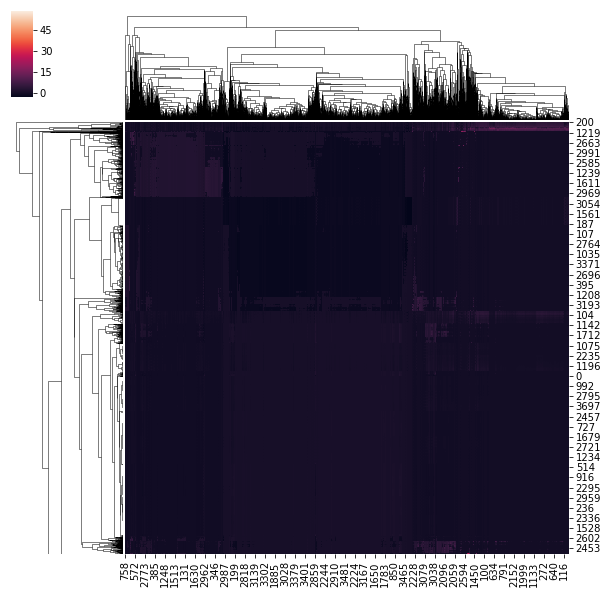

In [73]:
sns.clustermap(s_expr_restored);
#sns.clustermap(random_expr);
plt.show()

# Intensity histograms

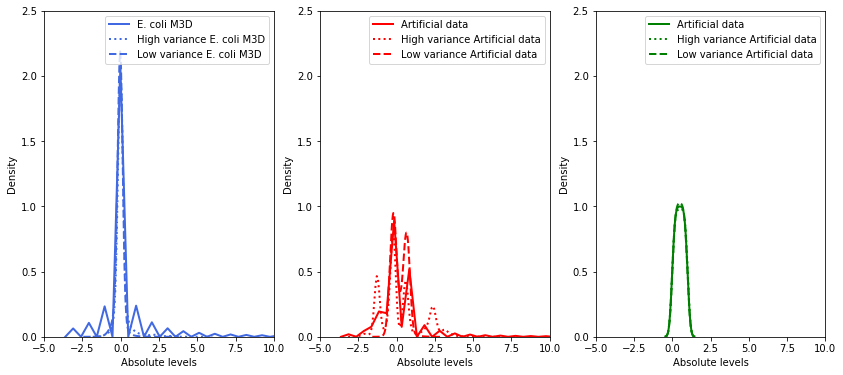

In [74]:
plt.figure(figsize=(14, 6))
plt.subplot(131)
plot_intensities(r_expr,plot_quantiles=True)
plt.ylim(0.,2.5)
plt.xlim(-5.,10)
plt.subplot(132)
#plot_intensities(s_expr_restored, plot_quantiles=True, dataset_name='Artificial data', color='red')
plot_intensities(s_expr_restored, plot_quantiles=True, dataset_name='Artificial data', color='red')
plt.ylim(0.,2.5)
plt.xlim(-5.,10)
plt.subplot(133)
plot_intensities(random_expr_restored, plot_quantiles=True, dataset_name='Artificial data', color='green')
plt.ylim(0.,2.5)
plt.xlim(-5.,10)
plt.show()

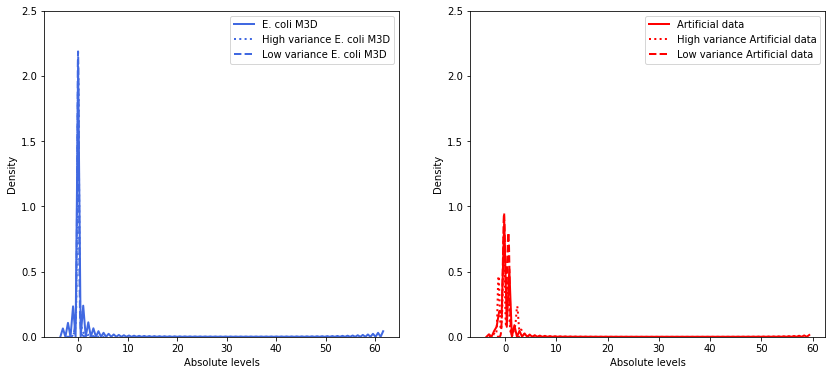

In [75]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_intensities(r_expr,plot_quantiles=True)
plt.ylim(0.,2.5)
plt.subplot(122)
#plot_intensities(s_expr_restored, plot_quantiles=True, dataset_name='Artificial data', color='red')
plot_intensities(s_expr_restored, plot_quantiles=True, dataset_name='Artificial data', color='red')
plt.ylim(0.,2.5)
plt.show()

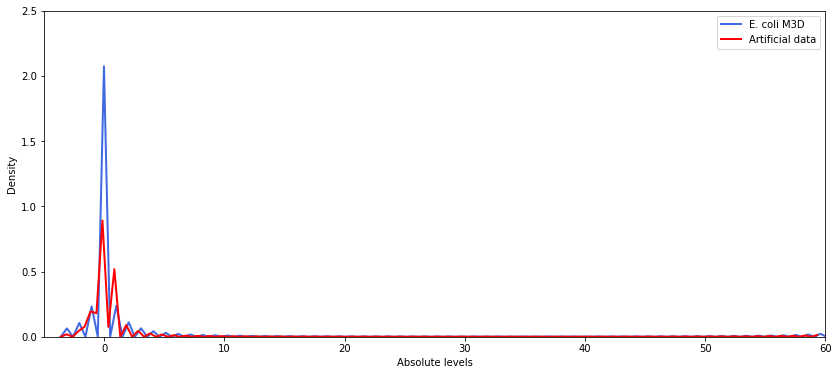

In [76]:
plt.figure(figsize=(14, 6))
ax = plot_intensities(expr_train, plot_quantiles=False)
plot_intensities(s_expr_restored, dataset_name='Artificial data', color='red', plot_quantiles=False, ax=ax)
plt.ylim(0.,2.5)
plt.xlim(-5.,60)
#plt.ylim(0.,0.000001)
#plt.xlim(0.1,100000)
plt.show()

# Gene ranges histograms

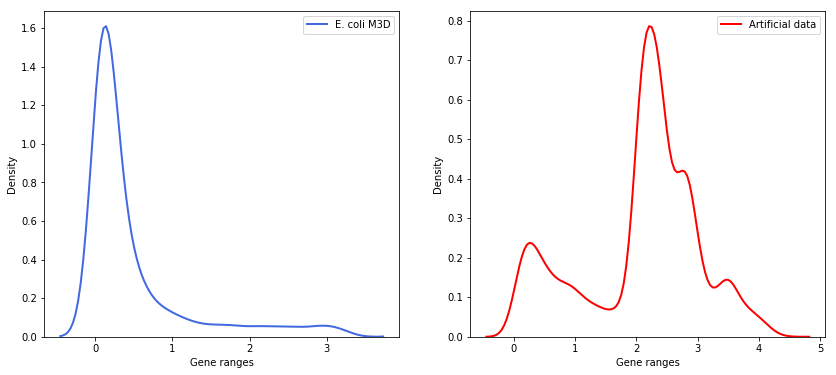

In [77]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_gene_ranges(r_expr)
plt.subplot(122)
plot_gene_ranges(s_expr_restored, dataset_name='Artificial data', color='red')
#plot_gene_ranges(random_expr_restored, dataset_name='Artificial data', color='red')
plt.show()

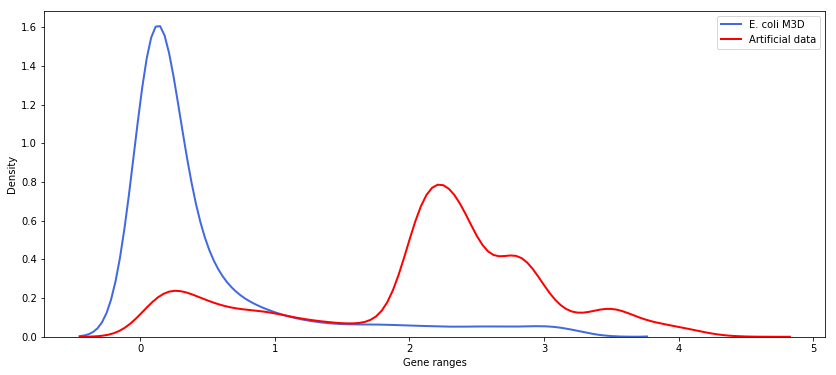

In [78]:
plt.figure(figsize=(14, 6))
# plt.subplot(121)
ax = plot_gene_ranges(expr_train)
# plt.subplot(122)
plot_gene_ranges(s_expr_restored, dataset_name='Artificial data', color='red', ax=ax)
#plot_gene_ranges(random_expr_restored, dataset_name='Artificial data', color='red', ax=ax)
plt.show()

# Compare background distributions

In [79]:
r_tf_tg_corr, r_tg_tg_corr = compute_tf_tg_corrs(r_expr, gene_symbols)
#s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(random_expr_restored, gene_symbols)
s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(s_expr_restored, gene_symbols)
r_back_corr = correlations_list(r_expr, r_expr)
s_back_corr = correlations_list(s_expr_restored, s_expr_restored)
#s_back_corr = correlations_list(random_expr_restored, random_expr_restored)

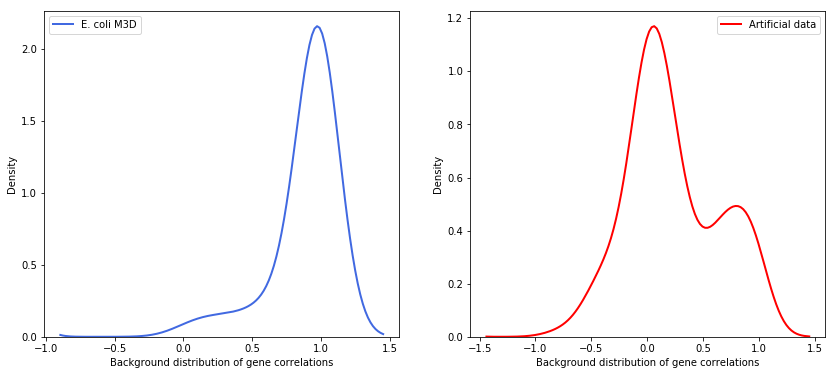

In [80]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations', ylabel='Density',)
plt.subplot(122)
plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', ylabel='Density', label='Artificial data', color='red')
plt.show()

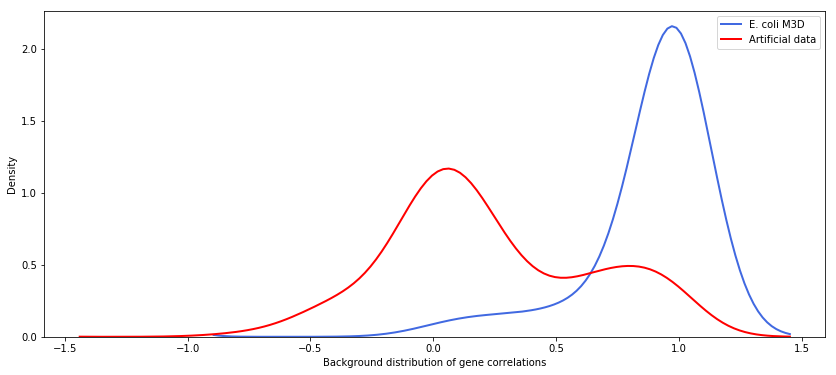

In [81]:
plt.figure(figsize=(14, 6))
ax = plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations')
plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', ylabel='Density', label='Artificial data', color='red')
plt.show()

# Quantitative analysis

In [82]:
print(expr_train.shape)
print(expr_test.shape)
print(s_expr.shape)

(1873, 3556)
(1874, 3556)
(3747, 3556)


In [83]:
scores = compute_scores_no_network(r_expr, s_expr_restored, gene_symbols)
#score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tftg', 'S_tgtg', 'S_tfac']
score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tfac']
print('gGAN')
for name, score in zip(score_names, scores):
    print('{}: {}'.format(name, score))

gGAN
S_dist: 0.20995053624626037
S_dend: 0.08513800779949854
S_sdcc: 0.03155309869198987
S_tfac: nan


/auto/homes/ha376/adversarial-generation-of-gene-expression-data-master/src/utils.py:259: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = lambda x, w: np.dot(w, x) / w.sum()
/auto/homes/ha376/adversarial-generation-of-gene-expression-data-master/src/utils.py:260: RuntimeWarning: invalid value encountered in double_scalars
  weighted_var = lambda x, w, mean: np.dot(w, (x - mean) ** 2) / w.sum()
/auto/homes/ha376/adversarial-generation-of-gene-expression-data-master/src/utils.py:261: RuntimeWarning: invalid value encountered in double_scalars
  weighted_covar = lambda x, y, w, mean_x, mean_y: np.dot(w * (x - mean_x), y - mean_y) / w.sum()


In [84]:
scores_boundaries = compute_scores_no_network(expr_train, expr_test, gene_symbols)
#score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tftg', 'S_tgtg', 'S_tfac']
score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tfac']
print('gGAN')
for name, score in zip(score_names, scores_boundaries):
    print('{}: {}'.format(name, score))

gGAN
S_dist: 0.9991998626753934
S_dend: 0.9311198762912639
S_sdcc: 0.002281485538869723
S_tfac: nan


/auto/homes/ha376/adversarial-generation-of-gene-expression-data-master/src/utils.py:259: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = lambda x, w: np.dot(w, x) / w.sum()
/auto/homes/ha376/adversarial-generation-of-gene-expression-data-master/src/utils.py:260: RuntimeWarning: invalid value encountered in double_scalars
  weighted_var = lambda x, w, mean: np.dot(w, (x - mean) ** 2) / w.sum()
/auto/homes/ha376/adversarial-generation-of-gene-expression-data-master/src/utils.py:261: RuntimeWarning: invalid value encountered in double_scalars
  weighted_covar = lambda x, y, w, mean_x, mean_y: np.dot(w * (x - mean_x), y - mean_y) / w.sum()


In [85]:
scores_boundaries_low = compute_scores_no_network(r_expr, random_expr_restored, gene_symbols)
#score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tftg', 'S_tgtg', 'S_tfac']
score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tfac']
print('gGAN')
for name, score in zip(score_names, scores_boundaries_low):
    print('{}: {}'.format(name, score))

gGAN
S_dist: -0.000352382033784082
S_dend: -0.0005592772651869466
S_sdcc: 0.7478968637877049
S_tfac: nan


/auto/homes/ha376/adversarial-generation-of-gene-expression-data-master/src/utils.py:259: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = lambda x, w: np.dot(w, x) / w.sum()
/auto/homes/ha376/adversarial-generation-of-gene-expression-data-master/src/utils.py:260: RuntimeWarning: invalid value encountered in double_scalars
  weighted_var = lambda x, w, mean: np.dot(w, (x - mean) ** 2) / w.sum()
/auto/homes/ha376/adversarial-generation-of-gene-expression-data-master/src/utils.py:261: RuntimeWarning: invalid value encountered in double_scalars
  weighted_covar = lambda x, y, w, mean_x, mean_y: np.dot(w * (x - mean_x), y - mean_y) / w.sum()


In [86]:
print(gene_symbols)

['Mapoly0307s0001.v3.1' 'Mapoly0024s0089.v3.1' 'Mapoly0098s0005.v3.1' ...,
 'Mapoly0005s0124.v3.1' 'Mapoly0029s0071.v3.1' 'Mapoly0067s0036.v3.1']


# Analyze gene histograms

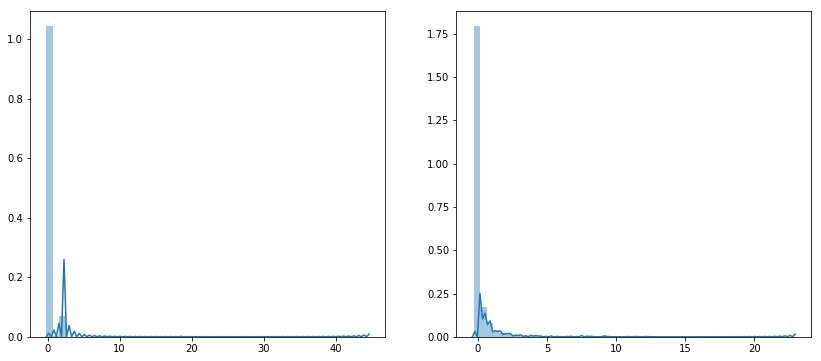

In [98]:
crp_idx = np.argwhere(np.array(gene_symbols) == 'Mapoly0024s0089.v3.1')
idx = crp_idx
plt.figure(figsize=(14, 6))
plt.title('Expression levels of CRP');
plt.subplot(121)
ax = sns.distplot(s_expr_restored[:, idx])
plt.subplot(122)
ax = sns.distplot(r_expr[:, idx])
plt.show()

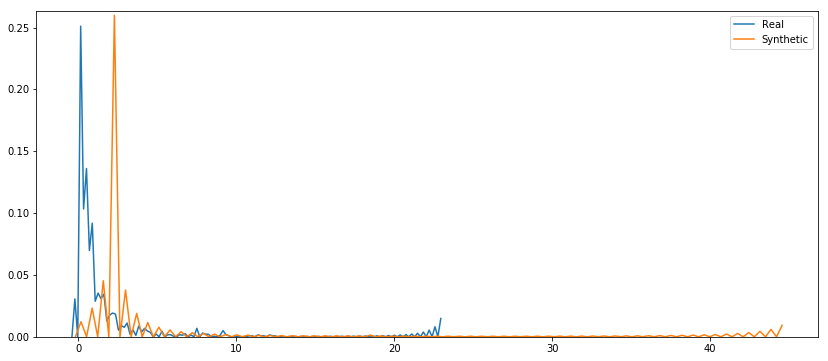

In [99]:
plt.figure(figsize=(14, 6))
r_expr_gene = r_expr[:, crp_idx]
s_expr_gene = s_expr_restored[:, crp_idx]
ax = sns.distplot(r_expr_gene, hist=False, label='Real')
ax = sns.distplot(s_expr_gene, hist=False, label='Synthetic')
plt.show()

In [100]:
diag = np.diag(np.ones(nb_genes))
r_corr = pearson_correlation(r_expr, r_expr) - diag
s_corr = pearson_correlation(s_expr_restored, s_expr_restored) - diag
crp_idx = np.argwhere(np.array(gene_symbols) == 'Mapoly0024s0089.v3.1').ravel()

In [101]:
r_corr_crp = r_corr[crp_idx, :].ravel()
s_corr_crp = s_corr[crp_idx, :].ravel()
r_max_corr_crp = np.max(r_corr_crp)
s_max_corr_crp = np.max(s_corr_crp)
sorted_idxs = np.argsort(r_corr_crp)[::-1]
print('CRP max correlated ({:.4f}) gene: {}'.format(r_max_corr_crp, gene_symbols[sorted_idxs[0]]))
print('CRP correlation with {} in synthetic: {}'.format(gene_symbols[sorted_idxs[0]], s_corr_crp[sorted_idxs[0]]))

CRP max correlated (0.2778) gene: Mapoly0088s0084.v3.1
CRP correlation with Mapoly0088s0084.v3.1 in synthetic: 0.04658998176455498


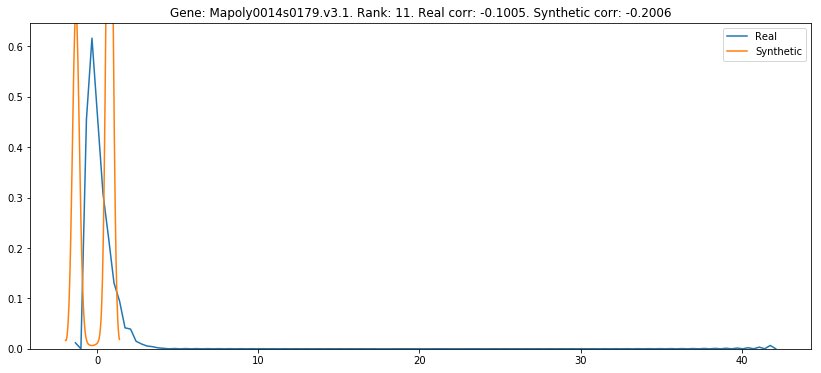

In [102]:
idx = -11
plt.figure(figsize=(14, 6))
r_expr_gene = expr_train[:, sorted_idxs[idx]]
s_expr_gene = s_expr[:, sorted_idxs[idx]]
plt.title('Gene: {}. Rank: {}. Real corr: {:.4f}. Synthetic corr: {:.4f}'.format(gene_symbols[sorted_idxs[idx]],
                                                                          max(idx+1, abs(idx)),
                                                                          r_corr_crp[sorted_idxs[idx]],
                                                                          s_corr_crp[sorted_idxs[idx]]))
ax = sns.distplot(r_expr_gene, hist=False, label='Real')
ax = sns.distplot(s_expr_gene, hist=False, label='Synthetic')
plt.show()

# Master regulators' histograms

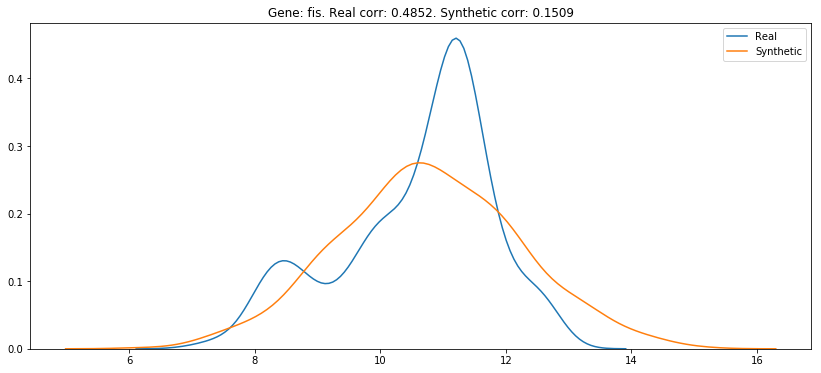

In [84]:
master_regulators = ['fis', 'hns', 'lrp', 'fnr', 'arca']
idx = 0
idx = np.argwhere(np.array(gene_symbols) == master_regulators[idx]).ravel()[0]
plt.figure(figsize=(14, 6))
r_expr_gene = expr_train[:, idx]
s_expr_gene = s_expr[:, idx]
plt.title('Gene: {}. Real corr: {:.4f}. Synthetic corr: {:.4f}'.format(gene_symbols[idx],
                                                                          r_corr_crp[idx],
                                                                          s_corr_crp[idx]))
ax = sns.distplot(r_expr_gene, hist=False, label='Real')
ax = sns.distplot(s_expr_gene, hist=False, label='Synthetic')
plt.show()

# Save CSV

In [103]:
write_csv('real.csv', expr_train, gene_symbols)
write_csv('synthetic.csv', s_expr, gene_symbols)